# Gausscount analysis for scan 13
An example of how to run gausscount

In [1]:
import sys
sys.path.insert(0,'..')

from gausscount import counting
from gausscount import profile

import h5py
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

In [2]:
# Key files
raw_file = "/pscratch/sd/j/jrenner1/data_scan0000000013.h5"
counted_file = "/global/cfs/cdirs/ncemhub/jrenner1/scan13/counted_gauss_prior_scan0000000013_lowth.h5"

th_single_elec = 10
baseline = 20.0

In [ ]:
fn = h5py.File(raw_file,'r')
imgs = fn['stem']['images']
frames = fn['frames']
imgs

In [ ]:
fn = h5py.File(counted_file,'r')
fn['electron_events/frames'][110*2064]

#### Determine the single-electron "Gaussian" profile

In [ ]:
nframes_profile = 1000
profile_file = raw_file
avg_patch, optimized_patch, A_opt, sigma_opt = profile.gaussian_profile(profile_file, nframes_profile, baseline, th_single_elec, plot_results=True)
print(f"Determined optimal gaussian amplitude A = {A_opt}, sigma = {sigma_opt}")

#### Perform the counting
Use selected values of A and sigma

In [3]:
# found: A = 32.73370388682819, sigma = 1.3240527365974009
frame_width = 576
gauss_A = 15 #19.032279882831432
gauss_sigma = 0.6 #0.5065158792172835

In [ ]:
# Count the dataset (one may want to first count 1 batch to evaluate the loss)
nframes_prior = 1000
frames_per_batch = 2064
losses = counting.count_frames(raw_file, counted_file, frames_per_batch, 
                               th_single_elec, baseline, gauss_A, gauss_sigma, 
                               loss_per_frame_stop=0.5, n_steps_max=3000,
                               min_loss_patience = 100, min_loss_improvement = 0.01,
                               batch_start=65, nframes_prior=nframes_prior)

Text(0, 0.5, 'Loss')

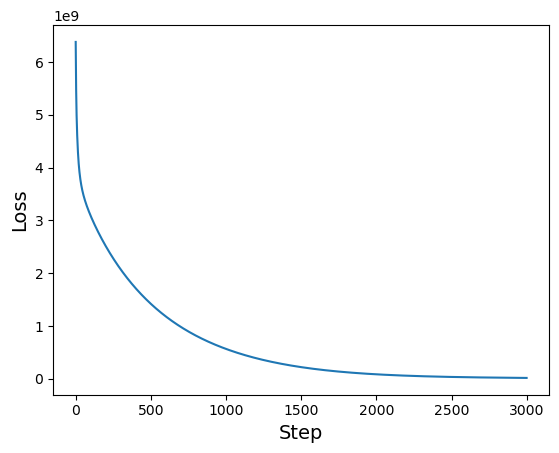

In [5]:
# Plot a loss curve
plt.plot(losses[0][0])
plt.xlabel('Step',fontsize=14)
plt.ylabel('Loss',fontsize=14)